In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the data
data = pd.read_csv(r"C:\Users\91876\Downloads\electric_vehicle_charging_station_list.csv")  # Replace 'your_data_file.csv' with the actual file path

# Step 4: Perform basic data exploration
print(data.head())  # Display the first few rows of the DataFrame
print(data.info())  # Get information about the DataFrame, including data types and missing values
print(data.describe())  # Summary statistics of numerical columns

   no region    type  power       service
0   1   NDMC  DC-001  15 kW  Self Service
1   2   NDMC  DC-001  15 kW  Self Service
2   3   NDMC  DC-001  15 kW  Self Service
3   4   NDMC  DC-001  15 kW  Self Service
4   5   NDMC  DC-001  15 kW  Self Service
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       202 non-null    int64 
 1   region   202 non-null    object
 2   type     202 non-null    object
 3   power    202 non-null    object
 4   service  202 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.0+ KB
None
               no
count  202.000000
mean   101.500000
std     58.456537
min      1.000000
25%     51.250000
50%    101.500000
75%    151.750000
max    202.000000


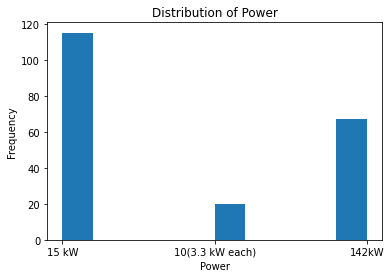

In [2]:
# Step 5: Summarize and visualize the data
# Histogram of a numerical variable
plt.hist(data['power'])
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.title('Distribution of Power')
plt.show()

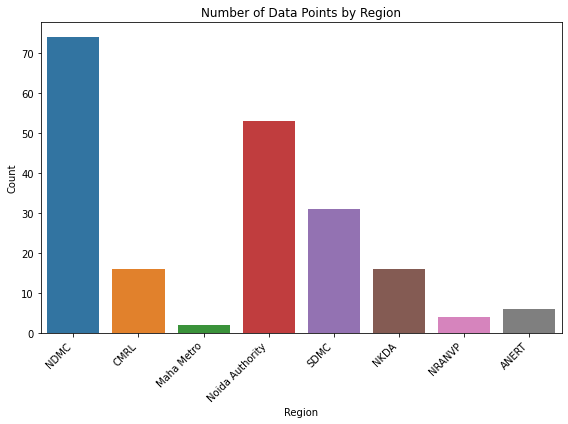

In [20]:
# Set figure size
plt.figure(figsize=(8, 6))

# Bar plot of a categorical variable
sns.countplot(data=data, x='region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Number of Data Points by Region')

# Adjust x-axis labels rotation
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


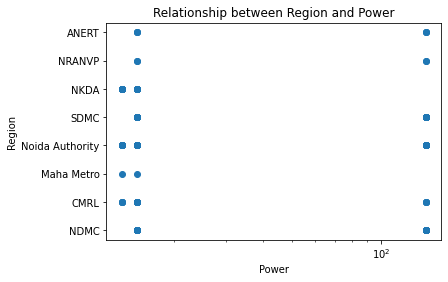

In [18]:
# Step 6: Explore relationships between variables
# Scatter plot of two numerical variables
plt.scatter(data['power'], data['region'])
plt.ylabel('Region')
plt.xlabel('Power')
plt.title('Relationship between Region and Power')

# Set x-axis ticks and scale
x_ticks = [10, 15, 142]
plt.xticks(x_ticks)
plt.xscale('log')

plt.show()

C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster
1    115
0     67
2     20
Name: count, dtype: int64


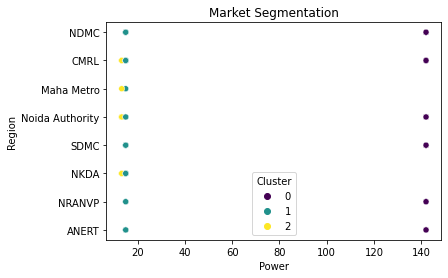

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import re

# Step 2: Load the data
data = pd.read_csv(r"C:\Users\91876\Downloads\electric_vehicle_charging_station_list.csv")  # Replace 'your_data_file.csv' with the actual file path

# Step 3: Data cleaning and preprocessing
# Extract the numerical value from 'power' column
data['power'] = data['power'].apply(lambda x: re.findall(r'[\d.]+', x)).apply(lambda x: sum(float(i) for i in x))

# Select relevant features for clustering
features = ['power']

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

# Step 4: Perform clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Define the number of clusters
kmeans.fit(data_scaled)

# Step 5: Assign cluster labels to the data
data['Cluster'] = kmeans.labels_

# Step 6: Analyze the clusters
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)

# Step 7: Visualize the clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=data, x='power', y='region', hue='Cluster', palette='viridis')
plt.xlabel('Power')
plt.ylabel('Region')
plt.title('Market Segmentation')
plt.show()


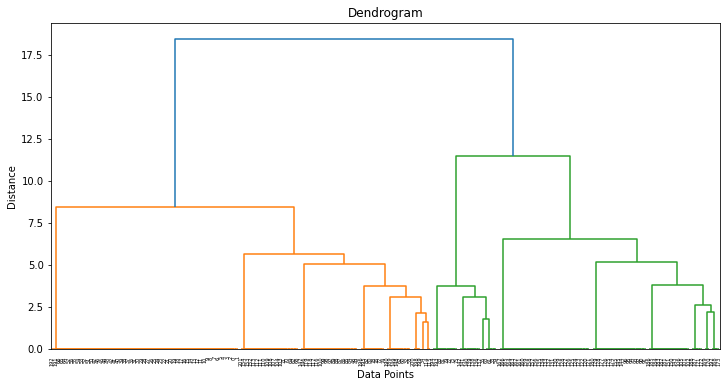

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the data
data = pd.read_csv(r"C:\Users\91876\Downloads\electric_vehicle_charging_station_list.csv")  # Replace 'your_data_file.csv' with the actual file path

# Step 2: Data preprocessing
# Select relevant features for clustering
features = ['region', 'type', 'power', 'service']

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Step 3: Calculate the distance matrix
distance_matrix = hierarchy.distance.pdist(data_encoded)

# Step 4: Perform hierarchical clustering
linkage = hierarchy.linkage(distance_matrix, method='ward')

# Step 5: Create a dendrogram
plt.figure(figsize=(12, 6))
dn = hierarchy.dendrogram(linkage, labels=data.index)
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.title('Dendrogram')

plt.show()


C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less 

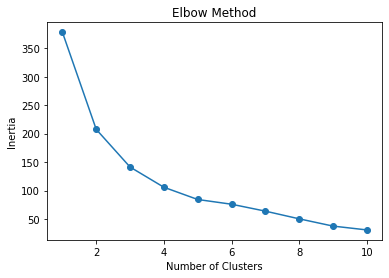

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the data
data = pd.read_csv(r"C:\Users\91876\Downloads\electric_vehicle_charging_station_list.csv")  # Replace 'your_data_file.csv' with the actual file path

# Step 2: Data preprocessing
# Select relevant features for clustering
features = ['region', 'type', 'power', 'service']

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Step 3: Perform clustering with different number of clusters
max_clusters = 10
inertia = []

for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_encoded)
    inertia.append(kmeans.inertia_)

# Step 4: Plot the elbow curve
plt.plot(range(1, max_clusters + 1), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder

# Step 1: Load the data
data = pd.read_csv(r"C:\Users\91876\Downloads\electric_vehicle_charging_station_list.csv")  # Replace 'your_data_file.csv' with the actual file path

# Step 2: Data preprocessing
# Select relevant features for clustering
features = ['region', 'type', 'power', 'service']

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Step 3: Perform clustering with a chosen number of clusters
n_clusters = 3  # Replace with the desired number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_encoded)
labels = kmeans.labels_

# Step 4: Calculate the silhouette score
silhouette_avg = silhouette_score(data_encoded, labels)
print("The silhouette score is:", silhouette_avg)


The silhouette score is: 0.5680190075174787


C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91876\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


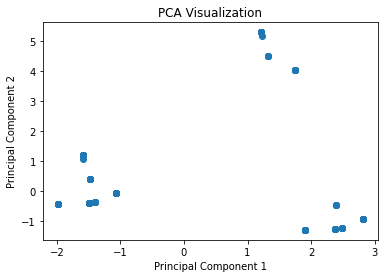

In [5]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv(r"C:\Users\91876\Downloads\electric_vehicle_charging_station_list.csv")  # Replace 'your_data_file.csv' with the actual file path

# Step 2: Data preprocessing
# Select relevant features for PCA
features = ['region', 'type', 'power', 'service']

# Convert categorical variables to numerical using one-hot encoding
data_encoded = pd.get_dummies(data[features])

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)

# Step 3: Perform PCA
pca = PCA(n_components=2)  # Specify the desired number of components
principal_components = pca.fit_transform(data_scaled)

# Step 4: Visualize the results
plt.scatter(principal_components[:, 0], principal_components[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()
